# Численное интегрирование. Светимость черного тела
Скулкин Никита Алексеевич 382008-2
# Цель работы
Для формулы $$ \varphi(\lambda, T) =\frac{2 \pi h c^2}{\lambda^5 \left(e^{\frac{h c}{\lambda k T}} - 1\right)}, $$ 


1.   Построить для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$
2.   С помощью численного интегрирования найти светимость Солнца на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от $\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.
3.   Найдите также светимость Солнца для всех длин волн: от $0$ до $\infty$ (несобственный интеграл).
4.   Этот интеграл, оказывается, можно взять аналитически и энергетическая светимость равна $R^* = \sigma T^4$, где $$ \sigma = \frac{8\pi^5 k^4}{15 c^3 h^3} $$ Это так называемый закон Стефана–Больцмана. Константа $\sigma$ называется константой Стефана–Больцмана. Чтобы узнать полную энергетическую светимость не забудьте $R^*$ умножить на площадь поверхности Солнца. Сравните полученный результат с результатом из предыдущего пункта.
5.   Найдите так называемую солнечную постоянную – мощность солнечного излучения, падающего перпендикулярно на единичную площадку на высоте верхней границы атмосферы Земли. Вам пригодится расстояние от Солна до Земли: $149.6\times 10^9$ м
6.   Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.
7.   Сделать выводы.



In [121]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from scipy import integrate

h = 6.6261 * 10**-34
k = 1.3806 * 10**-23
c = 2.9979 * 10**8
T = 5778


# Построим график зависимости $\varphi(\lambda, T)$ от $\lambda$
 

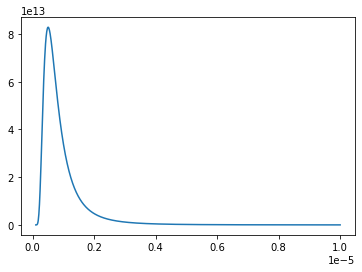

In [124]:
phi = lambda alpha: (2*math.pi*h*(c**2))/((alpha**5)*(math.e**(h*c/(alpha*k*T))-1))

alpha = np.linspace(10**-7,10**-5,1000)
plt.plot(alpha,phi(alpha))

# Определим светимость солнца на промежутке видимой длинны волн
от 3.5 * 10^-7 до 7 * 10^-7

In [179]:
R1,err = integrate.quad(phi,3.5*10**(-7),7*10**(-7))
R1

26456131.405975413

# Светимость Солнца для всех длин волн: от $0$ до $\infty$ через несобственный интеграл

In [167]:
res1,err = integrate.quad(phi,0,np.inf)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """Entry point for launching an IPython kernel.


Домножим результат на площадь поверхности солнца, чтоб получить светимость для всей поверхности

In [168]:
Ssun = 6.07877*10**18
res1 = res1 * Ssun
res1

3.825782793125503e+26

# Светимость через постоянную Стефана–Больцмана

In [169]:
stef_b = 5.67 * 10**-8
Rstar = stef_b * T**4
res2 = Rstar * Ssun
res2

3.841571496722059e+26

Результат через простоянную отличаеться от предыдущего на:

In [170]:
print(res1-res2)

-1.5788703596555743e+24


# Нахождение солнечной постоянной

Солнечную постоянную можно найти, разделив светимость солнца на площадь поверхности сферы радиусом в одну астрономическую единицу(расстояние от земли до солнца) по определению.

In [182]:
rearth = 149.6 * 10**9
Result = res2/(4*math.pi*rearth**2)
Result

1365.9533554367943

# Соответствие полученых величин с величинами из литературы

Значение солнечной постоянной - 1367 Вт/м²,
мое значение :

In [176]:
Result

1365.9533554367943

Светимость солнца - 3,828⋅10^26,
мое значение:

In [177]:
res1

3.825782793125503e+26

Светисмоть солнца на видимом промежутке от $\lambda_1$ до $\lambda_2$ найти не удалось. Мое значение :

In [180]:
R1

26456131.405975413

# Вывод


С небольшой погрешностью полученые результаты соответствуют действительным, а результат, полученый с помощью взятия несобственного интеграла являеться более точным чем через постоянную Стефана–Больцмана